# Confusion Matrix
- 정확도 (accurcy)
```
from sklearn.metrics import accuracy_score
accuracy_score(정답, 예측)
```

- 정밀도 (precision)
```
from sklearn.metrics import precision_score
precision_score(정답, 예측)
```

- 재현율 (recall)
```
from sklearn.metrics import recall_score
recall_score(정답, 예측)
```


- F1 스코어
```
from sklearn.metrics import f1_score
f1_score(정답, 예측)
```

- ROC, AUC
```
from sklearn.metrics import roc_auc_score
roc_auc_score(정답, 예측)
```


# Decision Tree
- 스케일이나 평균을 원점에 맞추는 것과 같은 데이터 전처리가 거의 필요하지 않음

Decision Tree의 규제 매개변수 종류
- **max_depth** : 트리 최대 깊이 <br />
  max_depth 감소 → 모델 규제 증가 →과적합 감소
- **min_samples_split** : 분할되기 위해 노드가 가져야 하는 최소 샘플 수 <br />
  min_samples_split 증가 → 모델 규제 증가 → 과적합 감소
- **min_samples_leaf** : leaf node가 가지고 있어야할 최소 샘플 수 <br />
  min_samples_leaf 증가 → 모델 규제 증가 → 과적합 감소
- **min_weight_fraction_leaf** : min_samples_leaf와 비슷, 가중치가 부여된 전체 샘플 수에서의 비 <br />
  min_weight_fraction_leaf 증가 → 모델 규제 증가 → 과적합 감소
- **max_leaf_nodes** : leaf node의 총 최대 개수 <br />
  max_leaf_nodes 감소 → 모델 규제 증가 → 과적합 감소
- **max_features** : 최상의 분할을 찾을 때 고려할 기능의 수 <br />
  max_features 감소 → 모델 규제 증가 → 과적합 감소

# Iris Data

In [ ]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

In [ ]:
dfX = pd.DataFrame(iris.data, columns=iris.feature_names)
dfy = pd.DataFrame(iris.target, columns=['target'])

dfX.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


- sepal length: 꽃받침의 길이
- sepal width: 꽃받침의 너비
- petal length: 꽃잎의 길이
- petal width: 꽃잎의 너비

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.values
X_test = X_test.values

y_train = y_train.values.flatten() # 다차원 배열 공간을 1차원으로 평탄화
y_test = y_test.values.flatten()

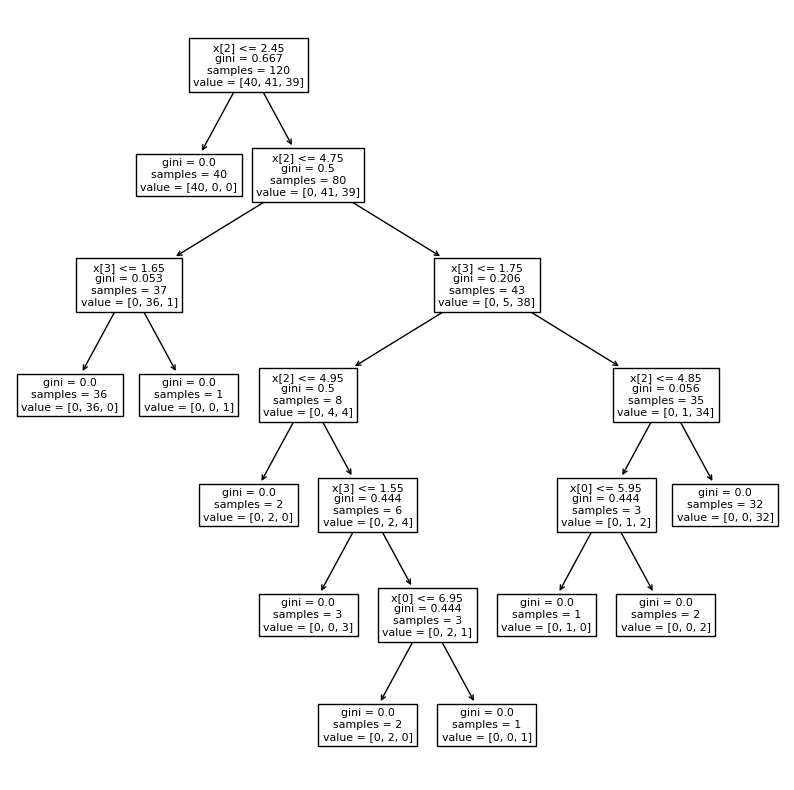

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

In [ ]:
y_pred = dtc.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
from sklearn.metrics import *
acc = accuracy_score(y_test, y_pred)
print("정확도 : ", acc)

정확도 :  1.0


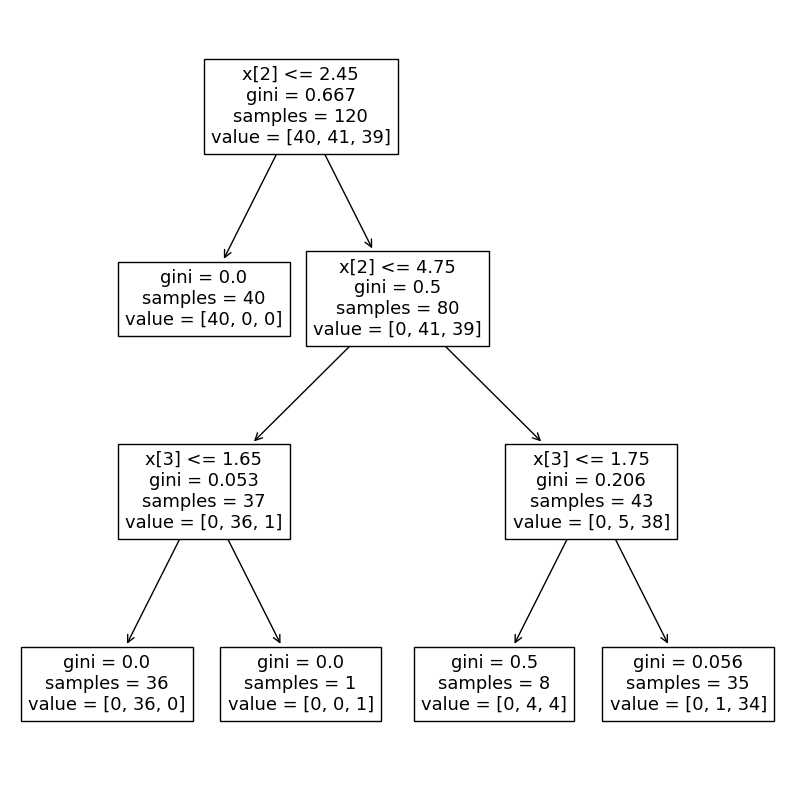

In [ ]:
dtc = DecisionTreeClassifier(max_depth=3) # max_depth를 지정해주지 않으면 gini=0까지
dtc.fit(X_train, y_train)
plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

In [ ]:
y_pred = dtc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("정확도 : ", acc)

정확도 :  1.0


# 펭귄 데이터로 DecisionTree 만들기

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/penguins.csv")

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
re = df.dropna(inplace=True)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
X = df.drop(['species'], axis=1)
y = df['species']

In [ ]:
# categorical data 원핫인코딩
X = pd.get_dummies(X)
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,1,0,0,1,0


### data size (train: test = 7:3)

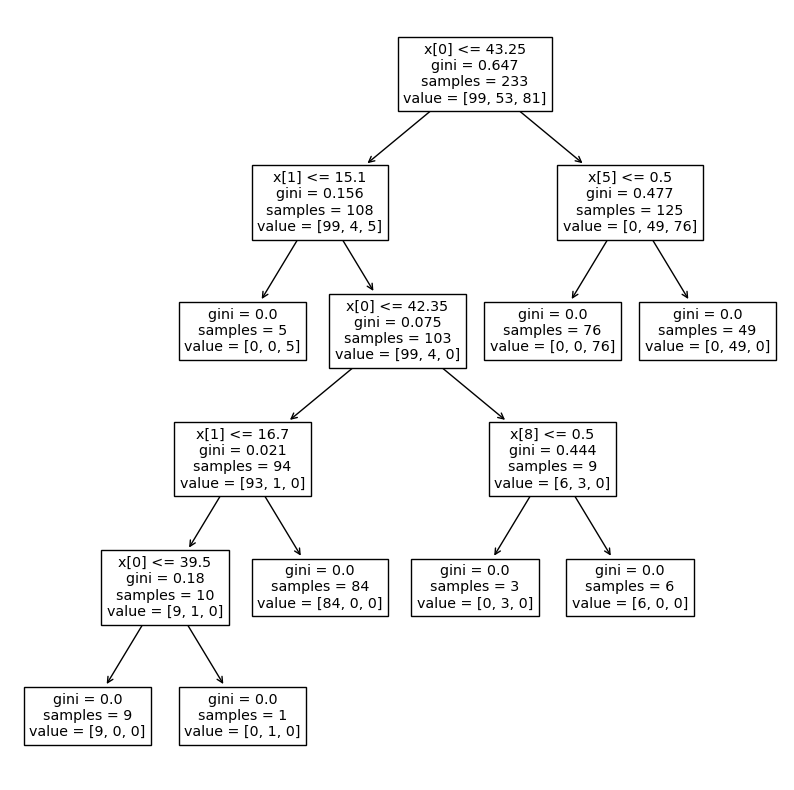

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

X_train = X_train.values
X_test = X_test.values

y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

data size (train: test = 8:2)

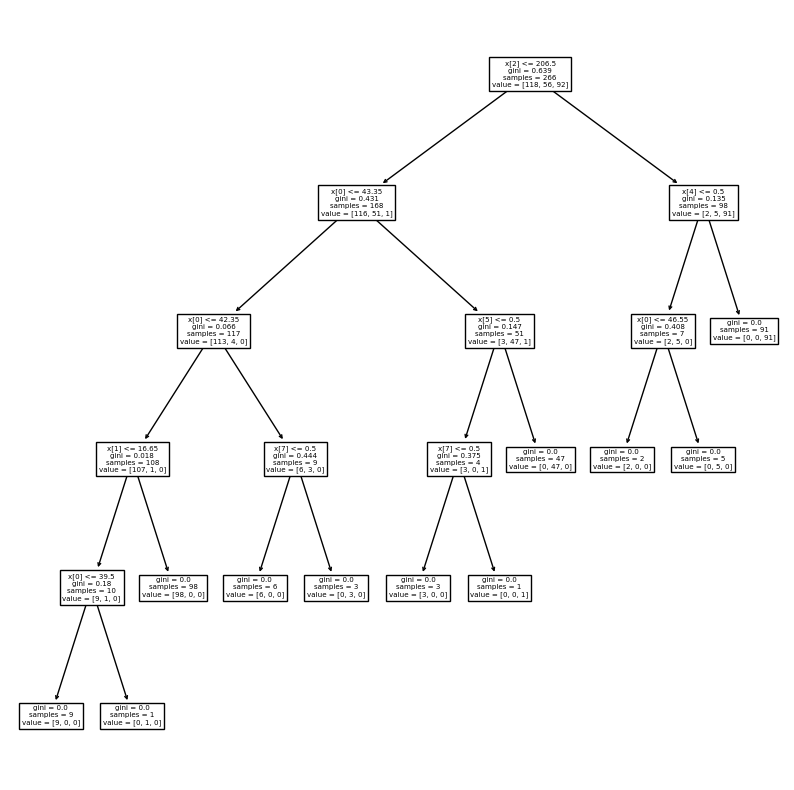

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

X_train = X_train.values
X_test = X_test.values

y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

### data size (train: test = 9:1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

In [ ]:
X_train = X_train.values
X_test = X_test.values

y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

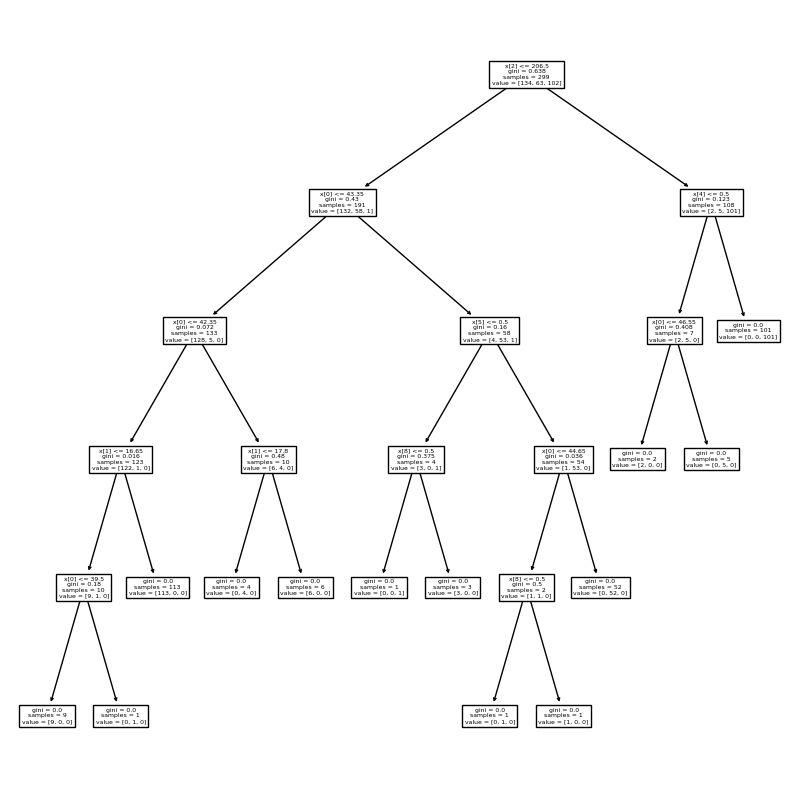

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

In [ ]:
y_pred = dtc.predict(X_test)
y_pred

array(['Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Chinstrap'], dtype=object)

In [ ]:
from sklearn.metrics import *
acc = accuracy_score(y_test, y_pred)
print("정확도 : ", acc)

정확도 :  0.9705882352941176


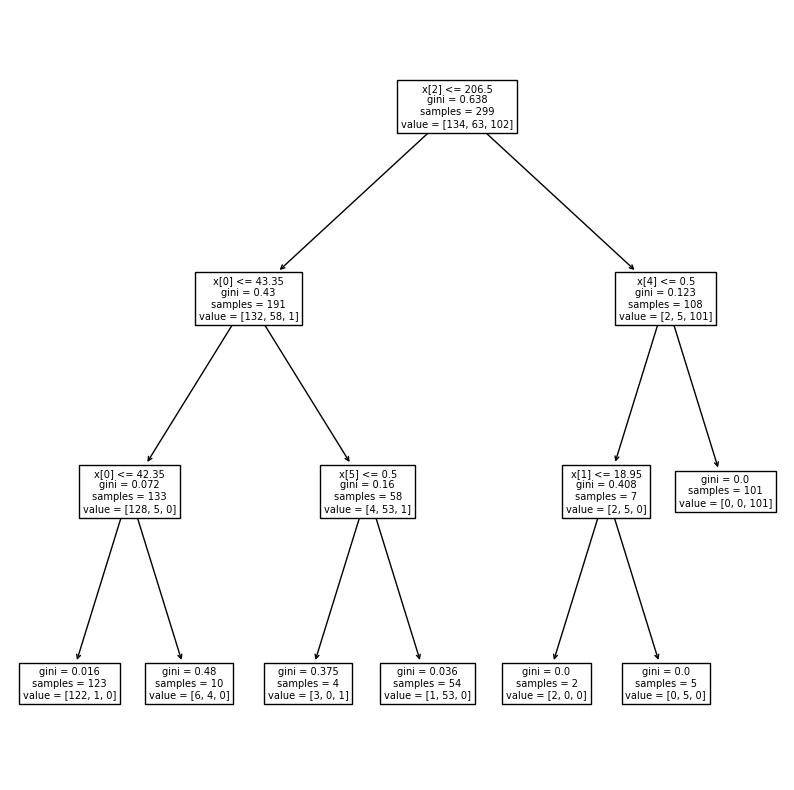

In [ ]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

In [ ]:
y_pred = dtc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("정확도 : ", acc)

정확도 :  1.0


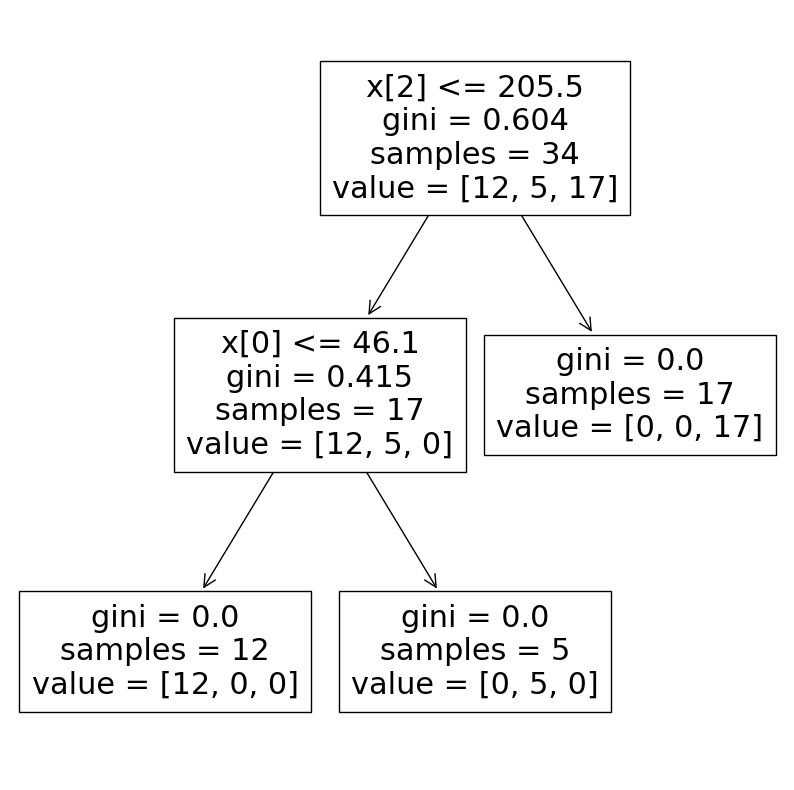

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_test,y_test)

plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()